# 04.01 - Data Import & Review & Cleaning
+ Imports & Setup
+ Data Review
 + Data Definition (shape, data types, description of the columns)
 + Count or percent per unique values
 + The range of values
 + Visual Inspection (missing values pct, target variables pct) 
 + Verify Data Integrity (is this one necessary?)
+ Data Cleaning
 + Missing Value Imputation
 + Duplicated Value Cleaning
 + Categorical Feature Encoding
 + Feature Grouping

## Imports & Setup

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# not sure if I should show this one ?
print(os.getcwd())
os.chdir('/Users/liuyang/Desktop/Springboard_Capstone')

/Users/liuyang/Desktop/Springboard_Capstone/notebooks


## Data Review

### Data shape

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [5]:
df.shape

(18359, 14)

### Column Names and data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

### Count of unique values

In [7]:
df.nunique()

enrollee_id               18359
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [8]:
pct = df.nunique()/df.shape[0]*100
pct = pct.apply(lambda x:"{:.4}%".format(x))
pct

enrollee_id                 100.0%
city                         0.67%
city_development_index     0.5066%
gender                    0.01634%
relevent_experience       0.01089%
enrolled_university       0.01634%
education_level           0.02723%
major_discipline          0.03268%
experience                 0.1198%
company_size              0.04358%
company_type              0.03268%
last_new_job              0.03268%
training_hours              1.313%
target                    0.01089%
dtype: object

### Range of values per column

In [9]:
df.agg([min,max]).T

,min,max
enrollee_id,1,33380
city,city_1,city_99
city_development_index,0.448,0.949
relevent_experience,Has relevent experience,No relevent experience
training_hours,1,336
target,0,1


In [10]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


### Visual Inspection

#### Missing values

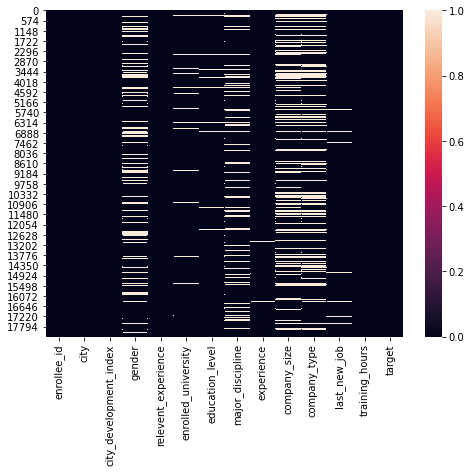

In [11]:
# Visualize patterns of missing values in the dataset
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=True)
plt.show()

In [12]:
# Check the percentage of minssing values for each columns
round(df.isnull().sum()/df.shape[0],3).sort_values(ascending=False)

company_type              0.274
company_size              0.260
gender                    0.223
major_discipline          0.155
education_level           0.025
last_new_job              0.020
enrolled_university       0.019
experience                0.003
target                    0.000
training_hours            0.000
relevent_experience       0.000
city_development_index    0.000
city                      0.000
enrollee_id               0.000
dtype: float64

#### The target percentage

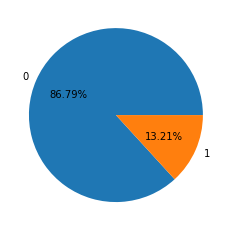

In [13]:
# Calculating target percentage. enrollee who is open to a new employment is labeled as 1. 
plt.pie(df.target.value_counts(), labels=df.target.unique(),autopct = '%.2f%%')
#plt.style.use('fivethirtyeight')
plt.show()

In [14]:
# Check duplicate values
# df[df.duplicated()]